In [1]:
import numpy as np
import matplotlib.pyplot as plt

Convert Flower output history into a simple list

In [2]:
def convert_acc(acc_history):
  """
  Extract the history of the centralized test accuracy from Flower simulation
  output and disregards the round index.
  Params:
    acc_history: list of <num_rounds> tuples of form (<round_idx>, <accuracy>)
  Returns:
    converted_acc: simple list of accuracies in acc_history
  """
  converted_acc = []
  for t in range(len(acc_history)):
    converted_acc.append(acc_history[t][1])
  return converted_acc

### Experiment 1

FL experiment configured for 10 rounds with 2, 5, 10, 20 client in the pool.\
FL rounds will proceed with 100.0% of clients sampled.

Class histogram for 0-th partition (alpha=1000.0, 10 classes): [1329 1441 1346 1346 1325 1392 1234 1426 1271 1390]

IID alpha = 1000.0 and 0.1 of local datasets reserved for validation.



In [11]:
num_clients = [2, 5, 10, 25]

class_dist = [1329, 1441, 1346, 1346, 1325, 1392, 1234, 1426, 1271, 1390]

exp1_accuracy_2 = convert_acc([(0, 0.109), (1, 0.6396666666666667), (2, 0.8323333333333334), (3, 0.8756666666666667), (4, 0.9116666666666666), (5, 0.932), (6, 0.936), (7, 0.953), (8, 0.9696666666666667), (9, 0.961), (10, 0.971)])
exp1_accuracy_5 = convert_acc([(0, 0.10166666666666667), (1, 0.483), (2, 0.7793333333333333), (3, 0.8576666666666667), (4, 0.8833333333333333), (5, 0.9143333333333333), (6, 0.9243333333333333), (7, 0.9383333333333334), (8, 0.9523333333333334), (9, 0.9573333333333334), (10, 0.9626666666666667)])
exp1_accuracy_10 = convert_acc([(0, 0.10366666666666667), (1, 0.5383333333333333), (2, 0.7683333333333333), (3, 0.8366666666666667), (4, 0.858), (5, 0.8616666666666667), (6, 0.89), (7, 0.902), (8, 0.907), (9, 0.9176666666666666), (10, 0.929)])
exp1_accuracy_25 = convert_acc([(0, 0.094), (1, 0.4063333333333333), (2, 0.713), (3, 0.7796666666666666), (4, 0.8063333333333333), (5, 0.8326666666666667), (6, 0.8416666666666667), (7, 0.8466666666666667), (8, 0.851), (9, 0.8606666666666667), (10, 0.8693333333333333)])

final_accs_total = [exp1_accuracy_2[-1], exp1_accuracy_5[-1], exp1_accuracy_10[-1], exp1_accuracy_25[-1]]

print(final_accs_total)

[0.971, 0.9626666666666667, 0.929, 0.8693333333333333]


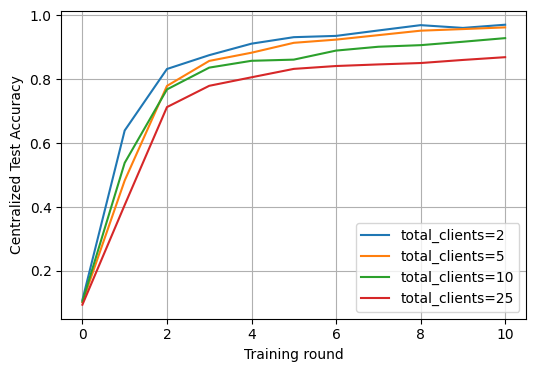

In [134]:
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(1, 1)

ax.grid('on')
ax.plot(exp1_accuracy_2)
ax.plot(exp1_accuracy_5)
ax.plot(exp1_accuracy_10)
ax.plot(exp1_accuracy_25)
ax.set(xlabel='Training round', ylabel='Centralized Test Accuracy')
ax.legend(['total_clients=2', 'total_clients=5', 'total_clients=10', 'total_clients=25']);

plt.savefig('exp1_test_accs', bbox_inches='tight', pad_inches=0.1)

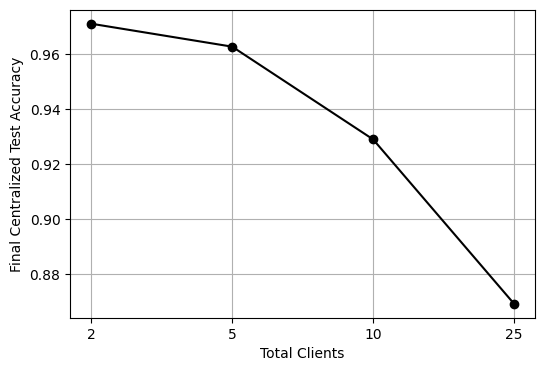

In [135]:
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(1, 1)

ax.plot(final_accs_total, marker='o', color='black'), ax.grid('on')
ax.set(xlabel='Total Clients', ylabel='Final Centralized Test Accuracy', xticks=[0, 1, 2, 3], xticklabels=['2', '5', '10', '25']);

plt.savefig('exp1_final_test_accs', bbox_inches='tight', pad_inches=0.1)

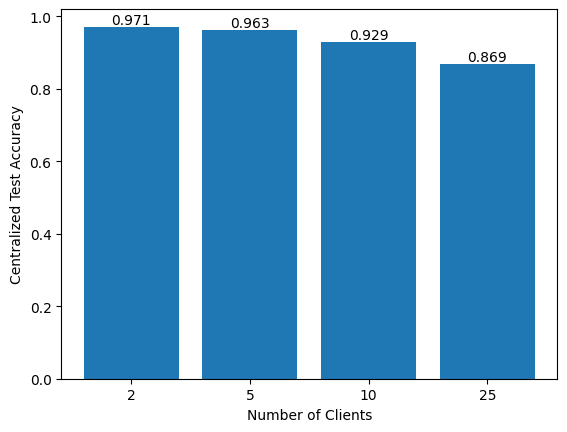

In [ ]:
xx = [0, 1, 2, 3]
ss = [str(round(i, 3)) for i in final_accs]

plt.bar(xx, final_accs)
for i in xx:
  plt.text(i, final_accs[i]+0.007, ss[i], ha='center')
plt.xticks(ticks=xx, labels=['2', '5', '10', '25'])
plt.xlabel('Number of Clients')
plt.ylabel('Centralized Test Accuracy');


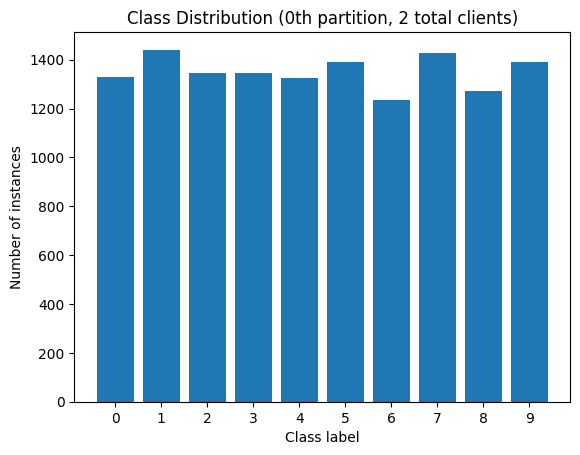

In [ ]:
xx = [i for i in range(10)]
ss = [str(i) for i in class_dist]

plt.bar(xx, class_dist)
#for i in xx:
  #plt.text(i, class_dist[i]*1.007, ss[i], ha='center')
plt.xticks(ticks=xx)
plt.xlabel('Class label')
plt.ylabel('Number of instances');
plt.title('Class Distribution (0th partition, 2 total clients)');

### Experiment 2

FL experiment configured for 10 rounds with 25 client in the pool.\
FL rounds will proceed with 8%, 20%, 40%, 80% of clients sampled.

IID alpha = 1000.0 and 0.1 of local datasets reserved for validation.

In [10]:
num_clients = [2, 5, 10, 20]

class_dist = [103, 95, 109, 99, 123, 110, 101, 115, 115, 110] # 25 clients

exp2_accuracy_2o25 = convert_acc([(0, 0.108), (1, 0.531), (2, 0.7403333333333333), (3, 0.752), (4, 0.7643333333333333), (5, 0.785), (6, 0.6306666666666667), (7, 0.7636666666666667), (8, 0.778), (9, 0.673), (10, 0.7993333333333333)])
exp2_accuracy_5o25 = convert_acc([(0, 0.08233333333333333), (1, 0.5103333333333333), (2, 0.7063333333333334), (3, 0.714), (4, 0.7553333333333333), (5, 0.7833333333333333), (6, 0.764), (7, 0.8113333333333334), (8, 0.824), (9, 0.832), (10, 0.8)])
exp2_accuracy_10o25 = convert_acc([(0, 0.111), (1, 0.503), (2, 0.752), (3, 0.777), (4, 0.8086666666666666), (5, 0.7953333333333333), (6, 0.8256666666666667), (7, 0.834), (8, 0.846), (9, 0.8293333333333334), (10, 0.857)])
exp2_accuracy_20o25 = convert_acc([(0, 0.08633333333333333), (1, 0.42233333333333334), (2, 0.7236666666666667), (3, 0.776), (4, 0.8036666666666666), (5, 0.8166666666666667), (6, 0.8263333333333334), (7, 0.8286666666666667), (8, 0.8493333333333334), (9, 0.8576666666666667), (10, 0.8603333333333333)])
exp2_accuracy_25o25 = convert_acc([(0, 0.094), (1, 0.4063333333333333), (2, 0.713), (3, 0.7796666666666666), (4, 0.8063333333333333), (5, 0.8326666666666667), (6, 0.8416666666666667), (7, 0.8466666666666667), (8, 0.851), (9, 0.8606666666666667), (10, 0.8693333333333333)])

final_accs = [exp2_accuracy_2o25[-1], exp2_accuracy_5o25[-1], exp2_accuracy_10o25[-1], exp2_accuracy_20o25[-1], exp2_accuracy_25o25[-1]]

print(final_accs)

[0.7993333333333333, 0.8, 0.857, 0.8603333333333333, 0.8693333333333333]


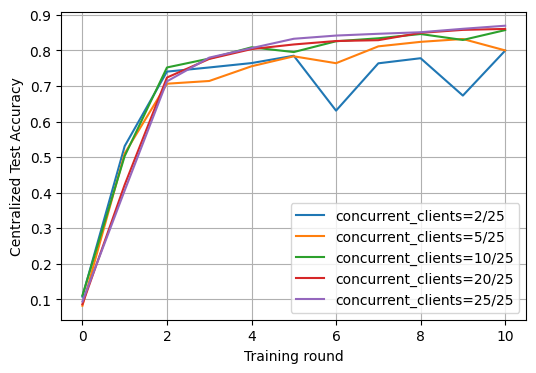

In [136]:
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(1, 1)

ax.grid('on')
ax.plot(exp2_accuracy_2o25)
ax.plot(exp2_accuracy_5o25)
ax.plot(exp2_accuracy_10o25)
ax.plot(exp2_accuracy_20o25)
ax.plot(exp2_accuracy_25o25)
ax.set(xlabel='Training round', ylabel='Centralized Test Accuracy')
ax.legend(['concurrent_clients=2/25', 'concurrent_clients=5/25', 'concurrent_clients=10/25', 'concurrent_clients=20/25', 'concurrent_clients=25/25']);

plt.savefig('exp2_test_accs', bbox_inches='tight', pad_inches=0.1)

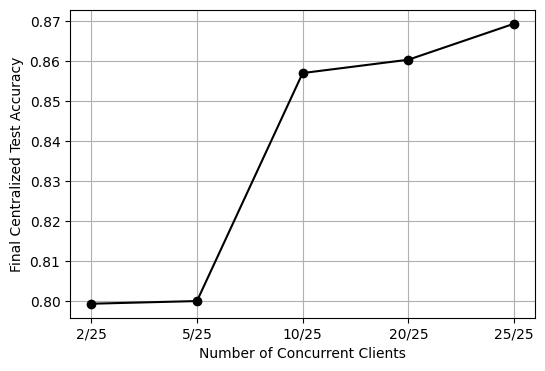

In [137]:
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(1, 1)

ax.plot(final_accs, marker='o', color='black'), ax.grid('on')
ax.set(xlabel='Number of Concurrent Clients', ylabel='Final Centralized Test Accuracy', xticks=[0, 1, 2, 3, 4], xticklabels=['2/25', '5/25', '10/25', '20/25', '25/25']);

plt.savefig('exp2_final_test_accs', bbox_inches='tight', pad_inches=0.1)

In [128]:
xx = [0, 1, 2, 3, 4]
ss = [str(round(i, 3)) for i in final_accs]

# plt.bar(xx, final_accs)
# for i in xx:
#   plt.text(i, final_accs[i]+0.007, ss[i], ha='center')
# plt.xticks(ticks=xx, labels=['2/25', '5/25', '10/25', '20/25', '25/25'])
# plt.xlabel('Number of Concurrent Clients')
# plt.ylabel('Centralized Test Accuracy');

# fig = plt.figure(figsize=(14, 5))
# ax = fig.subplots(1, 2)

# ax[1].plot(final_accs, marker='o', color='black'), ax[1].grid('on')
# ax[1].set(xlabel='Number of Concurrent Clients', ylabel='Final Centralized Test Accuracy', xticks=xx, xticklabels=['2/25', '5/25', '10/25', '20/25', '25/25']);

#plt.savefig('exp2_concurrent_clients', bbox_inches='tight', pad_inches=0.1)

### Experiment 3



In [15]:
class_hist_iid_02 = [0, 137, 949, 251, 310, 0, 8, 118, 0, 927]
class_hist_iid_05 = [2, 108, 230, 2, 52, 8, 97, 12, 799, 1390]
class_hist_iid_2 = [357, 251, 338, 264, 86, 323, 369, 258, 209, 245]
class_hist_iid_5 = [377, 219, 449, 305, 96, 283, 259, 173, 168, 371]
class_hist_iid_10 = [299, 279, 166, 220, 311, 242, 293, 185, 383, 322]
class_hist_iid_100 = [279, 272, 281, 248, 292, 276, 243, 292, 244, 273]
class_hist_iid_1000 = [268, 273, 279, 261, 270, 265, 260, 280, 272, 272]

exp3_accuracy_iid_02 = convert_acc([(0, 0.043666666666666666), (1, 0.331), (2, 0.427), (3, 0.6233333333333333), (4, 0.6696666666666666), (5, 0.738), (6, 0.765), (7, 0.7506666666666667), (8, 0.781), (9, 0.799), (10, 0.7916666666666666)])
exp3_accuracy_iid_05 = convert_acc([(0, 0.104), (1, 0.24666666666666667), (2, 0.49933333333333335), (3, 0.6196666666666667), (4, 0.754), (5, 0.7866666666666666), (6, 0.7983333333333333), (7, 0.8183333333333334), (8, 0.818), (9, 0.8203333333333334), (10, 0.8243333333333334)])
exp3_accuracy_iid_2 = convert_acc([(0, 0.11766666666666667), (1, 0.49266666666666664), (2, 0.7133333333333334), (3, 0.7416666666666667), (4, 0.7846666666666666), (5, 0.8093333333333333), (6, 0.8346666666666667), (7, 0.853), (8, 0.8576666666666667), (9, 0.8653333333333333), (10, 0.881)])
exp3_accuracy_iid_5 = convert_acc([(0, 0.142), (1, 0.3983333333333333), (2, 0.713), (3, 0.7466666666666667), (4, 0.7986666666666666), (5, 0.8253333333333334), (6, 0.853), (7, 0.867), (8, 0.877), (9, 0.8853333333333333), (10, 0.891)])
exp3_accuracy_iid_10 = convert_acc([(0, 0.05733333333333333), (1, 0.504), (2, 0.7723333333333333), (3, 0.815), (4, 0.836), (5, 0.858), (6, 0.879), (7, 0.8796666666666667), (8, 0.897), (9, 0.9), (10, 0.9073333333333333)])
exp3_accuracy_iid_100 = convert_acc([(0, 0.11266666666666666), (1, 0.4583333333333333), (2, 0.7606666666666667), (3, 0.8216666666666667), (4, 0.8326666666666667), (5, 0.8516666666666667), (6, 0.8566666666666667), (7, 0.8736666666666667), (8, 0.8883333333333333), (9, 0.9036666666666666), (10, 0.908)])
exp3_accuracy_iid_1000 = convert_acc([(0, 0.12333333333333334), (1, 0.5626666666666666), (2, 0.7776666666666666), (3, 0.819), (4, 0.845), (5, 0.858), (6, 0.872), (7, 0.8826666666666667), (8, 0.8823333333333333), (9, 0.8946666666666667), (10, 0.90)])

exp3_cli_val_accuracies_iid_02 = [0.7204, 0.6148, 0.7296, 0.7389, 0.8074, 0.7889, 0.6963, 0.5389, 0.7611, 0.7667]
exp3_cli_val_accuracies_iid_05 = [0.7759, 0.8741, 0.7241, 0.7556, 0.7889, 0.7667, 0.7019, 0.7111, 0.6056, 0.7241]
exp3_cli_val_accuracies_iid_2 = [0.6833, 0.6019, 0.8019, 0.7630, 0.7963, 0.7667, 0.7278, 0.7815, 0.8204, 0.8815]
exp3_cli_val_accuracies_iid_5 = [0.7407, 0.7833, 0.8148, 0.7481, 0.8148, 0.7444, 0.7611, 0.7556, 0.7963, 0.8815]
exp3_cli_val_accuracies_iid_10 = [0.7704, 0.7352, 0.8037, 0.7796, 0.7722, 0.7833, 0.7426, 0.7648, 0.8000, 0.8815]
exp3_cli_val_accuracies_iid_100 = [0.7556, 0.7704, 0.7833, 0.7778, 0.7833, 0.7833, 0.7981, 0.7648, 0.8093, 0.8296]
exp3_cli_val_accuracies_iid_1000 = [0.7852, 0.7463, 0.7815, 0.8056, 0.7685, 0.7815, 0.7611, 0.7519, 0.7889, 0.8463]

final_iid_accs = [exp3_accuracy_iid_02[-1], exp3_accuracy_iid_05[-1], exp3_accuracy_iid_2[-1], exp3_accuracy_iid_5[-1], exp3_accuracy_iid_10[-1], exp3_accuracy_iid_100[-1], exp3_accuracy_iid_1000[-1]]

print(final_iid_accs)


[0.7916666666666666, 0.8243333333333334, 0.881, 0.891, 0.9073333333333333, 0.908, 0.9]


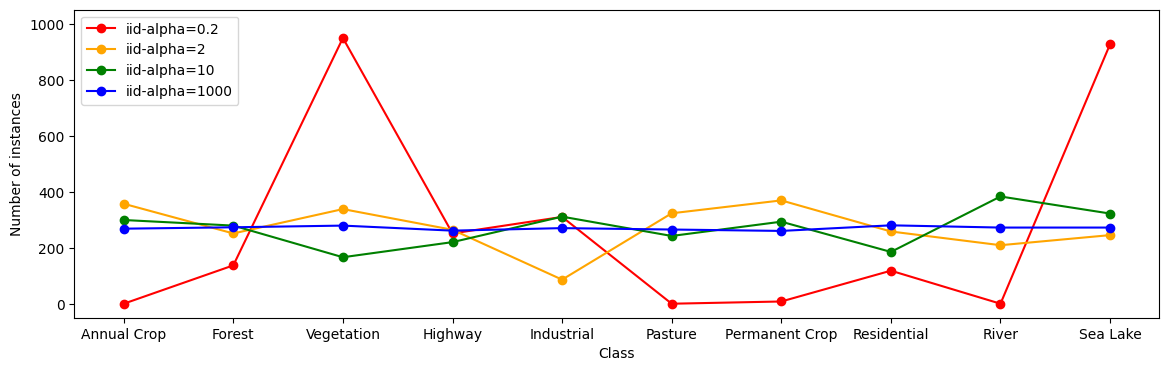

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

index = ['Annual Crop', 'Forest', 'Vegetation', 'Highway', 'Industrial', 'Pasture', 'Permanent Crop', 'Residential', 'River', 'Sea Lake']
df = pd.DataFrame({'iid-alpha=0.2': class_hist_iid_02,
                   #'iid-alpha=0.5': class_hist_iid_05,
                   'iid-alpha=2': class_hist_iid_2,
                   #'iid-alpha=5': class_hist_iid_5,
                   'iid-alpha=10': class_hist_iid_10,
                   #'iid-alpha=100': class_hist_iid_100,
                   'iid-alpha=1000': class_hist_iid_1000},
                  index=index)

ax = df.plot(figsize=(14, 4), rot=0, grid=False, marker='o', color={"iid-alpha=0.2": "red", "iid-alpha=2": "orange", "iid-alpha=10": "green", "iid-alpha=1000": "blue"})
ax.set(xlabel='Class', ylabel='Number of instances', xticks=np.linspace(0, 9, 10), xticklabels=index, ylim=[-50, 1050]);

plt.savefig('class_distributions')

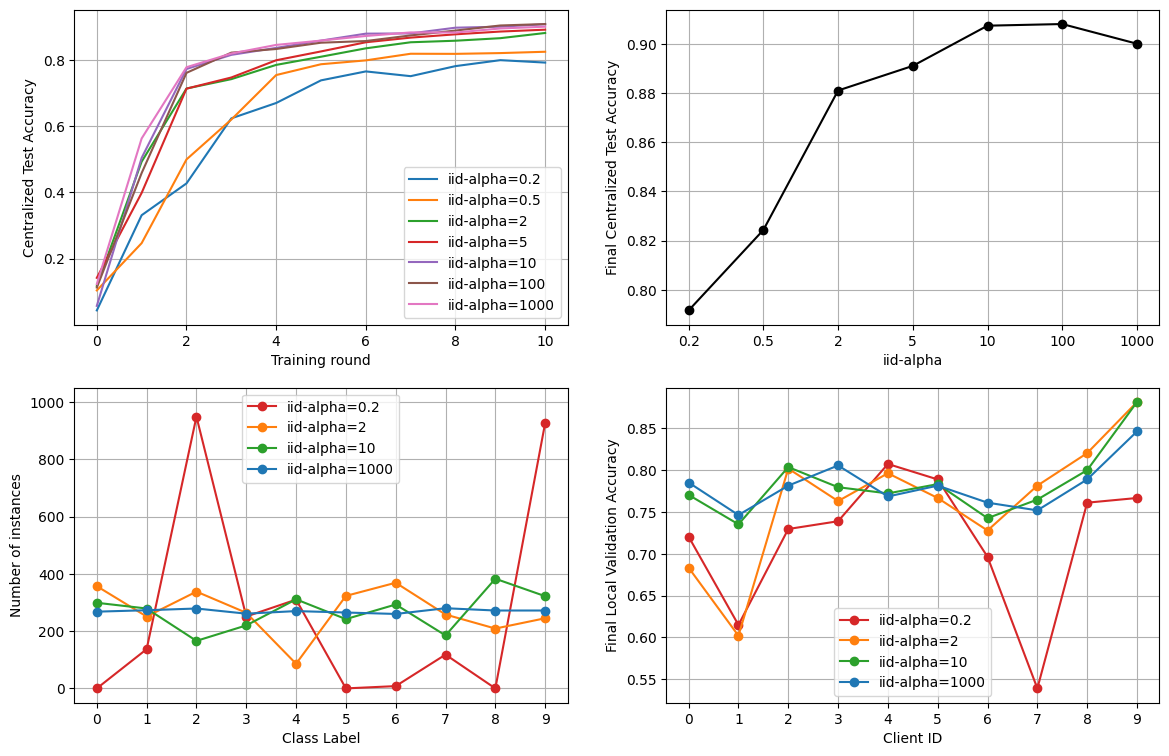

In [100]:
fig = plt.figure(figsize=(14, 9))
axarr = fig.subplots(2, 2)

# 1st plot
axarr[0][0].plot(exp3_accuracy_iid_02)
axarr[0][0].plot(exp3_accuracy_iid_05)
axarr[0][0].plot(exp3_accuracy_iid_2)
axarr[0][0].plot(exp3_accuracy_iid_5)
axarr[0][0].plot(exp3_accuracy_iid_10)
axarr[0][0].plot(exp3_accuracy_iid_100)
axarr[0][0].plot(exp3_accuracy_iid_1000)
axarr[0][0].set(xlabel='Training round', ylabel='Centralized Test Accuracy')
axarr[0][0].legend(['iid-alpha=0.2',
                    'iid-alpha=0.5',
                    'iid-alpha=2',
                    'iid-alpha=5',
                    'iid-alpha=10',
                    'iid-alpha=100',
                    'iid-alpha=1000']);
axarr[0][0].grid('on')

# 2nd plot
axarr[0][1].plot(final_iid_accs, marker='o', color='black'), axarr[0][1].grid('on')
axarr[0][1].set(xlabel='iid-alpha', ylabel='Final Centralized Test Accuracy', xticks=[0, 1, 2, 3, 4, 5, 6], xticklabels=[0.2, 0.5, 2, 5, 10, 100, 1000])

# 3rd plot
idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
index = ['Annual Crop', 'Forest', 'Vegetation', 'Highway', 'Industrial', 'Pasture', 'Permanent Crop', 'Residential', 'River', 'Sea Lake']
axarr[1][0].plot(class_hist_iid_02, marker='o', color='C3')
axarr[1][0].plot(class_hist_iid_2, marker='o', color='C1')
axarr[1][0].plot(class_hist_iid_10, marker='o', color='C2')
axarr[1][0].plot(class_hist_iid_1000, marker='o', color='C0'), axarr[1][0].grid('on')
axarr[1][0].set(xlabel='Class Label', ylabel='Number of instances', xticks=np.linspace(0, 9, 10), xticklabels=idx, ylim=[-50, 1050]);
axarr[1][0].legend(['iid-alpha=0.2',
                    #'iid-alpha=0.5',
                    'iid-alpha=2',
                    #'iid-alpha=5',
                    'iid-alpha=10',
                    #'iid-alpha=100',
                    'iid-alpha=1000']);

# 4th plot
exp3_cli_val_accuracies_iid_02

axarr[1][1].plot(exp3_cli_val_accuracies_iid_02, marker='o', color='C3')
axarr[1][1].plot(exp3_cli_val_accuracies_iid_2, marker='o', color='C1')
axarr[1][1].plot(exp3_cli_val_accuracies_iid_10, marker='o', color='C2')
axarr[1][1].plot(exp3_cli_val_accuracies_iid_1000, marker='o', color='C0'), axarr[1][1].grid('on')
axarr[1][1].set(xlabel='Client ID', ylabel='Final Local Validation Accuracy', xticks=np.linspace(0, 9, 10), xticklabels=idx);
axarr[1][1].legend(['iid-alpha=0.2',
                    #'iid-alpha=0.5',
                    'iid-alpha=2',
                    #'iid-alpha=5',
                    'iid-alpha=10',
                    #'iid-alpha=100',
                    'iid-alpha=1000']);

plt.savefig('exp3_everything')

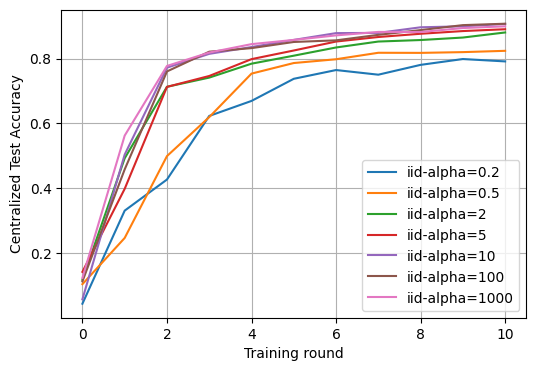

In [138]:
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(1, 1)
# 1st plot
ax.plot(exp3_accuracy_iid_02)
ax.plot(exp3_accuracy_iid_05)
ax.plot(exp3_accuracy_iid_2)
ax.plot(exp3_accuracy_iid_5)
ax.plot(exp3_accuracy_iid_10)
ax.plot(exp3_accuracy_iid_100)
ax.plot(exp3_accuracy_iid_1000)
ax.set(xlabel='Training round', ylabel='Centralized Test Accuracy')
ax.legend(['iid-alpha=0.2',
                    'iid-alpha=0.5',
                    'iid-alpha=2',
                    'iid-alpha=5',
                    'iid-alpha=10',
                    'iid-alpha=100',
                    'iid-alpha=1000']);
ax.grid('on')

plt.savefig('exp3_test_accs', bbox_inches='tight', pad_inches=0.1)

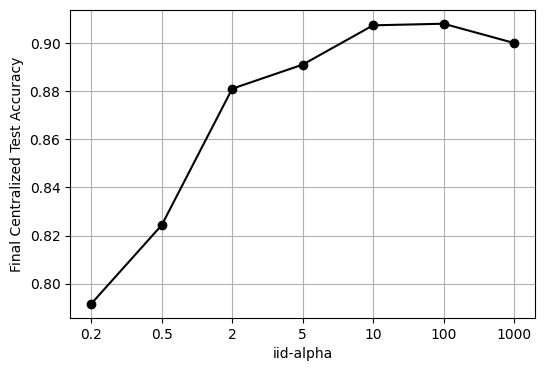

In [139]:
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(1, 1)

# 2nd plot
ax.plot(final_iid_accs, marker='o', color='black'), ax.grid('on')
ax.set(xlabel='iid-alpha', ylabel='Final Centralized Test Accuracy', xticks=[0, 1, 2, 3, 4, 5, 6], xticklabels=[0.2, 0.5, 2, 5, 10, 100, 1000]);

plt.savefig('exp3_final_test_accs', bbox_inches='tight', pad_inches=0.1)

[0.07809906529530299, 0.06587600473617082, 0.07338674335327873, 0.04197392523936734, 0.019335162916303543, 0.010361352469634452, 0.013737117601593147]


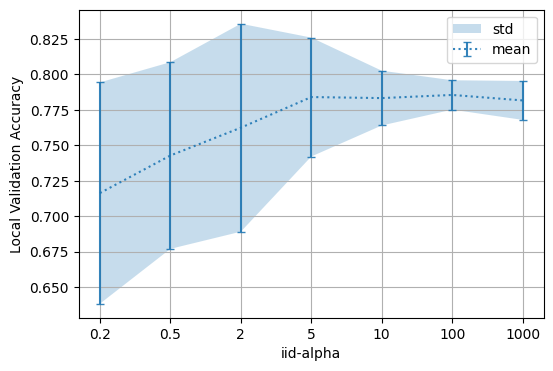

In [37]:
mu_02 = np.mean(exp3_cli_val_accuracies_iid_02)
mu_05 = np.mean(exp3_cli_val_accuracies_iid_05)
mu_2 = np.mean(exp3_cli_val_accuracies_iid_2)
mu_5 = np.mean(exp3_cli_val_accuracies_iid_5)
mu_10 = np.mean(exp3_cli_val_accuracies_iid_10)
mu_100 = np.mean(exp3_cli_val_accuracies_iid_100)
mu_1000 = np.mean(exp3_cli_val_accuracies_iid_1000)

var_02 = np.std(exp3_cli_val_accuracies_iid_02)
var_05 = np.std(exp3_cli_val_accuracies_iid_05)
var_2 = np.std(exp3_cli_val_accuracies_iid_2)
var_5 = np.std(exp3_cli_val_accuracies_iid_5)
var_10 = np.std(exp3_cli_val_accuracies_iid_10) / 2
var_100 = np.std(exp3_cli_val_accuracies_iid_100) / 2
var_1000 = np.std(exp3_cli_val_accuracies_iid_1000) / 2

xx = [0, 1, 2, 3, 4, 5, 6]
yy = [mu_02, mu_05, mu_2, mu_5, mu_10, mu_100, mu_1000]
stds = [var_02, var_05, var_2, var_5, var_10, var_100, var_1000]

print(stds)


# plot
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(1, 1)

data_1 = {'x': xx,
          'y': yy,
          'yerr': stds}

# only errorbar
# plt.subplot(211)
# for data in [data_1, data_2]:
#     plt.errorbar(**data, fmt='o')

# errorbar + fill_between
data = {'x': data_1['x'],
        'y1': [y - e for y, e in zip(data_1['y'], data_1['yerr'])],
        'y2': [y + e for y, e in zip(data_1['y'], data_1['yerr'])]}
ax.fill_between(**data, alpha=.25), ax.grid(True)
ax.errorbar(**data_1, alpha=.9, fmt=':', capsize=3, capthick=1)
ax.set(xlabel='iid-alpha', ylabel='Local Validation Accuracy', xticks=xx, xticklabels=[0.2, 0.5, 2, 5, 10, 100, 1000]);
ax.legend(['std', 'mean'])

plt.savefig('exp3_val_dists', bbox_inches='tight', pad_inches=0.1);

[270.0, 270.0, 270.0, 270.0, 270.0, 270.0, 270.0]


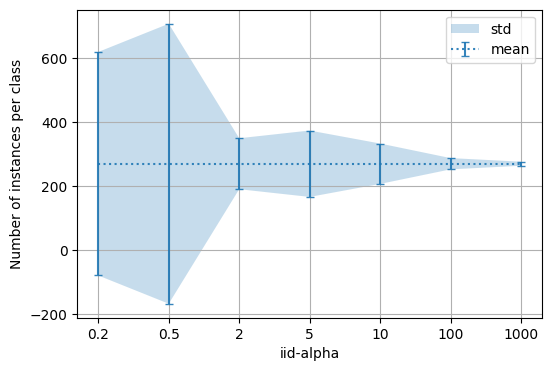

In [42]:

mu_02 = np.mean(class_hist_iid_02)
mu_05 = np.mean(class_hist_iid_05)
mu_2 = np.mean(class_hist_iid_2)
mu_5 = np.mean(class_hist_iid_5)
mu_10 = np.mean(class_hist_iid_10)
mu_100 = np.mean(class_hist_iid_100)
mu_1000 = np.mean(class_hist_iid_1000)

var_02 = np.std(class_hist_iid_02)
var_05 = np.std(class_hist_iid_05)
var_2 = np.std(class_hist_iid_2)
var_5 = np.std(class_hist_iid_5)
var_10 = np.std(class_hist_iid_10)
var_100 = np.std(class_hist_iid_100)
var_1000 = np.std(class_hist_iid_1000)

xx = [0, 1, 2, 3, 4, 5, 6]
yy = [mu_02, mu_05, mu_2, mu_5, mu_10, mu_100, mu_1000]
stds = [var_02, var_05, var_2, var_5, var_10, var_100, var_1000]

print(yy)


# plot
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(1, 1)

data_1 = {'x': xx,
          'y': yy,
          'yerr': stds}

# only errorbar
# plt.subplot(211)
# for data in [data_1, data_2]:
#     plt.errorbar(**data, fmt='o')

# errorbar + fill_between
ax.errorbar(**data_1, alpha=.9, fmt=':', capsize=3, capthick=1)
data = {'x': data_1['x'],
        'y1': [y - e for y, e in zip(data_1['y'], data_1['yerr'])],
        'y2': [y + e for y, e in zip(data_1['y'], data_1['yerr'])]}
ax.fill_between(**data, alpha=.25), ax.grid(True)
ax.set(xlabel='iid-alpha', ylabel='Number of instances per class', xticks=xx, xticklabels=[0.2, 0.5, 2, 5, 10, 100, 1000]);
ax.legend(['std', 'mean'])

plt.savefig('exp3_cls_dists_', bbox_inches='tight', pad_inches=0.1);

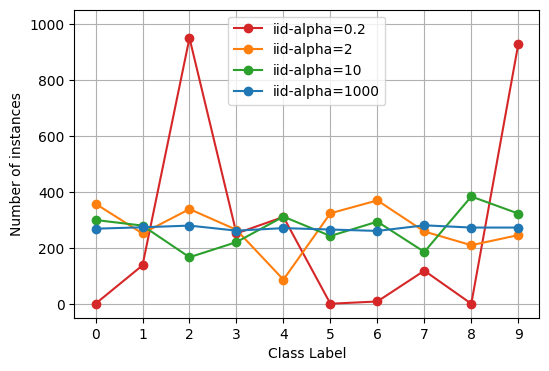

In [7]:
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(1, 1)

# 3rd plot
idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
index = ['Annual Crop', 'Forest', 'Vegetation', 'Highway', 'Industrial', 'Pasture', 'Permanent Crop', 'Residential', 'River', 'Sea Lake']
ax.plot(class_hist_iid_02, marker='o', color='C3')
ax.plot(class_hist_iid_2, marker='o', color='C1')
ax.plot(class_hist_iid_10, marker='o', color='C2')
ax.plot(class_hist_iid_1000, marker='o', color='C0'), ax.grid('on')
ax.set(xlabel='Class Label', ylabel='Number of instances', xticks=np.linspace(0, 9, 10), xticklabels=idx, ylim=[-50, 1050]);
ax.legend(['iid-alpha=0.2',
                    #'iid-alpha=0.5',
                    'iid-alpha=2',
                    #'iid-alpha=5',
                    'iid-alpha=10',
                    #'iid-alpha=100',
                    'iid-alpha=1000']);

plt.savefig('exp3_cls_dists', bbox_inches='tight', pad_inches=0.1)

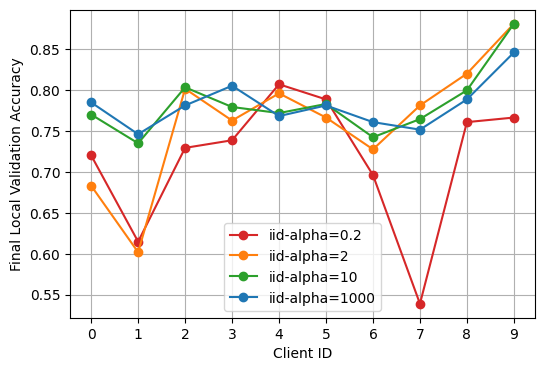

In [141]:
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(1, 1)

# 4th plot
exp3_cli_val_accuracies_iid_02

ax.plot(exp3_cli_val_accuracies_iid_02, marker='o', color='C3')
ax.plot(exp3_cli_val_accuracies_iid_2, marker='o', color='C1')
ax.plot(exp3_cli_val_accuracies_iid_10, marker='o', color='C2')
ax.plot(exp3_cli_val_accuracies_iid_1000, marker='o', color='C0'), ax.grid('on')
ax.set(xlabel='Client ID', ylabel='Final Local Validation Accuracy', xticks=np.linspace(0, 9, 10), xticklabels=idx);
ax.legend(['iid-alpha=0.2',
                    #'iid-alpha=0.5',
                    'iid-alpha=2',
                    #'iid-alpha=5',
                    'iid-alpha=10',
                    #'iid-alpha=100',
                    'iid-alpha=1000']);

plt.savefig('exp3_val_accs', bbox_inches='tight', pad_inches=0.1)

### Model Parameters

In [ ]:
from collections import OrderedDict
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from typing import Optional

class Net(nn.Module):
    """Simple CNN adapted from 'PyTorch: A 60 Minute Blitz'."""

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(2704, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 2704) # change to match the dimension of prev layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def get_weights(self):
        """Get model weights as a list of NumPy ndarrays."""
        return [val.cpu().numpy() for _, val in self.state_dict().items()]

    def set_weights(self, weights) -> None:
        """Set model weight s from a list of NumPy ndarrays."""
        state_dict = OrderedDict(
            {k: torch.Tensor(v) for k, v in zip(self.state_dict().keys(), weights)}
        )
        self.load_state_dict(state_dict, strict=True)

In [ ]:
from torchvision.models import resnet50

myNet = Net()

resnet = resnet50()

total_params = sum(param.numel() for param in myNet.parameters())
print(f"SimpleCNN total parameters: {total_params}")

total_params = sum(param.numel() for param in resnet.parameters())
print(f"ResNet50 total parameters: {total_params}")

SimpleCNN total parameters: 338486
ResNet50 total parameters: 25557032


98830.0


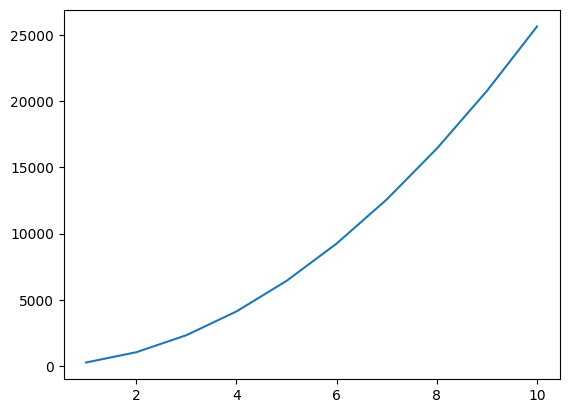

In [ ]:
import numpy as np

xx = np.linspace(1, 10, 10)
yy = np.square(16*xx) + 6*(xx-1)


print(sum(yy))

plt.plot(xx, yy)

In [44]:
oo = np.ones(10)

tt = np.linspace(1, 10, 10)

result = oo / tt

print(oo)
print(tt)
print(result)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[1.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714 0.125      0.11111111 0.1       ]


### Final Experiment

In [ ]:
final_precisions = [0.89044944, 0.90807799, 0.7398568 , 0.96103896, 0.99570815, 0.94776119, 0.71428571, 0.87855297, 0.76363636, 0.99657534]
final_recalls = [0.93786982, 0.98787879, 0.91176471, 0.49006623, 0.82269504, 0.61057692, 0.86956522, 0.98837209, 0.91636364, 0.95409836]
proportions = [0.11266667, 0.11      , 0.11333333, 0.10066667, 0.094     , 0.06933333, 0.092     , 0.11466667, 0.09166667, 0.10166667]

In [6]:
# iid 0.2

acc_iid_02 = 0.6323333333333333
precis_iid_02 = np.array([0.75919732, 0.79646018, 0.38721805, 0.68979592, 0.91791045, 0, 0.38461538, 0.90415335, 0.77327935, 0.70935961])
recs_iid_02 = np.array([0.67159763, 0.54545455, 0.60588235, 0.55960265, 0.43617021, 0.000001, 0.83333333, 0.82267442, 0.69454545, 0.9442623])
props_iid_02 = np.array([0.11266667, 0.11      , 0.11333333, 0.10066667, 0.094, 0.06933333, 0.092     , 0.11466667, 0.09166667, 0.10166667])

f1_iid_02 = 2 * (precis_iid_02 * recs_iid_02) / (precis_iid_02 + recs_iid_02)

precis_mu_02 = np.mean(precis_iid_02)
precis_std_02 = np.std(precis_iid_02)

recs_mu_02 = np.mean(recs_iid_02)
recs_std_02 = np.std(recs_iid_02)

f1_mu_02 = np.mean(f1_iid_02)
f1_std_02 = np.std(f1_iid_02)

print(f"\nPrecision: {precis_mu_02} +- {precis_std_02}")
print(f"\nRecall: {recs_mu_02} +- {recs_std_02}")
print(f"\nF1-score: {f1_mu_02} +- {f1_std_02}")


Precision: 0.6321989610000001 +- 0.2736538379274467

Recall: 0.611352389 +- 0.2503601248055395

F1-score: 0.5971671756659211 +- 0.2295362677061921


In [7]:
# iid 0.5

acc_iid_05 = 0.772
precis_iid_05 = np.array([0.85585586, 0.84574468, 0.71126761, 0.86013986, 0.83435583, 1.        , 0.56367925, 0.88713911, 0.595     , 0.90490798])
recs_iid_05 = np.array([0.84319527, 0.96363636, 0.59411765, 0.40728477, 0.96453901, 0.03365385, 0.86594203, 0.98255814, 0.86545455, 0.96721311])
props_iid_05 = np.array([0.11266667, 0.11      , 0.11333333, 0.10066667, 0.094, 0.06933333, 0.092     , 0.11466667, 0.09166667, 0.10166667])

f1_iid_05 = 2 * (precis_iid_05 * recs_iid_05) / (precis_iid_05 + recs_iid_05)

precis_mu_05 = np.mean(precis_iid_05)
precis_std_05 = np.std(precis_iid_05)

recs_mu_05 = np.mean(recs_iid_05)
recs_std_05 = np.std(recs_iid_05)

f1_mu_05 = np.mean(f1_iid_05)
f1_std_05 = np.std(f1_iid_05)

print(f"\nPrecision: {precis_mu_05} +- {precis_std_05}")
print(f"\nRecall: {recs_mu_05} +- {recs_std_05}")
print(f"\nF1-score: {f1_mu_05} +- {f1_std_05}")


Precision: 0.805809018 +- 0.13191549356847904

Recall: 0.7487594740000001 +- 0.2972001722806178

F1-score: 0.7165906172655172 +- 0.2519787738290717


In [8]:
# iid 2

acc_iid_2 = 0.8666666666666667
precis_iid_2 = np.array([0.92971246, 0.91788856, 0.8490566 , 0.78549849, 0.82926829, 0.8960396 , 0.73154362, 0.94460641, 0.79861111, 0.98281787])
recs_iid_2 = np.array([0.86094675, 0.94848485, 0.66176471, 0.86092715, 0.96453901, 0.87019231, 0.78985507, 0.94186047, 0.83636364, 0.93770492])
props_iid_2 = np.array([0.11266667, 0.11      , 0.11333333, 0.10066667, 0.094, 0.06933333, 0.092     , 0.11466667, 0.09166667, 0.10166667])

f1_iid_2 = 2 * (precis_iid_2 * recs_iid_2) / (precis_iid_2 + recs_iid_2)

precis_mu_2 = np.mean(precis_iid_2)
precis_std_2 = np.std(precis_iid_2)

recs_mu_2 = np.mean(recs_iid_2)
recs_std_2 = np.std(recs_iid_2)

f1_mu_2 = np.mean(f1_iid_2)
f1_std_2 = np.std(f1_iid_2)

print(f"\nPrecision: {precis_mu_2} +- {precis_std_2}")
print(f"\nRecall: {recs_mu_2} +- {recs_std_2}")
print(f"\nF1-score: {f1_mu_2} +- {f1_std_2}")


Precision: 0.866504301 +- 0.07629776411483162

Recall: 0.8672638880000001 +- 0.08709269876937112

F1-score: 0.8646558262484172 +- 0.07182219913597969


In [12]:
# iid 5

acc_iid_5 = 0.904
precis_iid_5 = np.array([0.89830508, 0.96119403, 0.88817891, 0.896     , 0.90789474, 0.90306122, 0.85823755, 0.93112948, 0.81587302, 0.96763754])
recs_iid_5 = np.array([0.9408284 , 0.97575758, 0.81764706, 0.74172185, 0.9787234 , 0.85096154, 0.8115942 , 0.98255814, 0.93454545, 0.98032787])
props_iid_5 = np.array([0.11266667, 0.11      , 0.11333333, 0.10066667, 0.094, 0.06933333, 0.092     , 0.11466667, 0.09166667, 0.10166667])

f1_iid_5 = 2 * (precis_iid_5 * recs_iid_5) / (precis_iid_5 + recs_iid_5)

precis_mu_5 = np.mean(precis_iid_5)
precis_std_5 = np.std(precis_iid_5)

recs_mu_5 = np.mean(recs_iid_5)
recs_std_5 = np.std(recs_iid_5)

f1_mu_5 = np.mean(f1_iid_5)
f1_std_5 = np.std(f1_iid_5)

print(f"\nPrecision: {precis_mu_5} +- {precis_std_5}")
print(f"\nRecall: {recs_mu_5} +- {recs_std_5}")
print(f"\nF1-score: {f1_mu_5} +- {f1_std_5}")


Precision: 0.902751157 +- 0.042737175743899854

Recall: 0.901466549 +- 0.08372465111510413

F1-score: 0.9004307364320369 +- 0.0559593079605005


In [13]:
# iid 10

acc_iid_10 = 0.909
precis_iid_10 = np.array([0.9537037 , 0.95535714, 0.83380282, 0.88732394, 0.92384106, 0.82743363, 0.89300412, 0.95100865, 0.86690647, 0.9704918 ])
recs_iid_10 = np.array([0.91420118, 0.97272727, 0.87058824, 0.83443709, 0.9893617 ,0.89903846, 0.78623188, 0.95930233, 0.87636364, 0.9704918 ])
props_iid_10 = np.array([0.11266667, 0.11      , 0.11333333, 0.10066667, 0.094, 0.06933333, 0.092     , 0.11466667, 0.09166667, 0.10166667])

f1_iid_10 = 2 * (precis_iid_10 * recs_iid_10) / (precis_iid_10 + recs_iid_10)

precis_mu_10 = np.mean(precis_iid_10)
precis_std_10 = np.std(precis_iid_10)

recs_mu_10 = np.mean(recs_iid_10)
recs_std_10 = np.std(recs_iid_10)

f1_mu_10 = np.mean(f1_iid_10)
f1_std_10 = np.std(f1_iid_10)

print(f"\nPrecision: {precis_mu_10} +- {precis_std_10}")
print(f"\nRecall: {recs_mu_10} +- {recs_std_10}")
print(f"\nF1-score: {f1_mu_10} +- {f1_std_10}")


Precision: 0.9062873330000001 +- 0.049644051427149886

Recall: 0.9072743589999999 +- 0.06332414544193762

F1-score: 0.906005832463643 +- 0.051182845115947465


In [14]:
# iid 100

acc_iid_10 = 0.911
precis_iid_10 = np.array([0.89430894, 0.92351275, 0.86337209, 0.88659794, 0.92592593, 0.91071429, 0.87550201, 0.95184136, 0.88847584, 0.9771987 ])
recs_iid_10 = np.array([0.97633136, 0.98787879, 0.87352941, 0.85430464, 0.9751773 , 0.73557692, 0.78985507, 0.97674419, 0.86909091, 0.98360656])
props_iid_10 = np.array([0.11266667, 0.11      , 0.11333333, 0.10066667, 0.094, 0.06933333, 0.092     , 0.11466667, 0.09166667, 0.10166667])

f1_iid_10 = 2 * (precis_iid_10 * recs_iid_10) / (precis_iid_10 + recs_iid_10)

precis_mu_10 = np.mean(precis_iid_10)
precis_std_10 = np.std(precis_iid_10)

recs_mu_10 = np.mean(recs_iid_10)
recs_std_10 = np.std(recs_iid_10)

f1_mu_10 = np.mean(f1_iid_10)
f1_std_10 = np.std(f1_iid_10)

print(f"\nPrecision: {precis_mu_10} +- {precis_std_10}")
print(f"\nRecall: {recs_mu_10} +- {recs_std_10}")
print(f"\nF1-score: {f1_mu_10} +- {f1_std_10}")


Precision: 0.909744985 +- 0.03365097736448353

Recall: 0.902209515 +- 0.08656943885779685

F1-score: 0.9044127003274147 +- 0.05619640627350986


In [16]:
# iid 1000

acc_iid_10 = 0.924
precis_iid_10 = np.array([0.93510324, 0.95744681, 0.84958217, 0.93382353, 0.9676259 , 0.90366972, 0.88931298, 0.93150685, 0.89454545, 0.98019802])
recs_iid_10 = np.array([0.93786982, 0.95454545, 0.89705882, 0.8410596 , 0.95390071, 0.94711538, 0.8442029 , 0.98837209, 0.89454545, 0.97377049])
props_iid_10 = np.array([0.11266667, 0.11      , 0.11333333, 0.10066667, 0.094, 0.06933333, 0.092     , 0.11466667, 0.09166667, 0.10166667])

f1_iid_10 = 2 * (precis_iid_10 * recs_iid_10) / (precis_iid_10 + recs_iid_10)

precis_mu_10 = np.mean(precis_iid_10)
precis_std_10 = np.std(precis_iid_10)

recs_mu_10 = np.mean(recs_iid_10)
recs_std_10 = np.std(recs_iid_10)

f1_mu_10 = np.mean(f1_iid_10)
f1_std_10 = np.std(f1_iid_10)

print(f"\nPrecision: {precis_mu_10} +- {precis_std_10}")
print(f"\nRecall: {recs_mu_10} +- {recs_std_10}")
print(f"\nF1-score: {f1_mu_10} +- {f1_std_10}")


Precision: 0.9242814669999999 +- 0.038049393584177936

Recall: 0.923244071 +- 0.04899898759048609

F1-score: 0.9232555452296145 +- 0.03863459251042885
